In [1]:
pwd

'/home/jovyan/critical_feature_extraction/ipynb'

In [118]:
cd .. 

/home/jovyan/critical_feature_extraction


In [119]:
%run __init__.py
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

### Clean Data:
1. Download stock (Apple) TI's
2. Check data
3. Drop unnessesary columns

In [120]:
apple = pd.read_csv('data/sandp500/individual_stocks_5yr_TECHNICALS_clean/AAPL_data.csv')

In [121]:
apple = apple.drop('Unnamed: 0', axis=1)
apple = apple.drop('Unnamed: 0.1', axis=1)
apple = apple.drop('Unnamed: 0.1.1', axis =1)
apple = apple.set_index(pd.to_datetime(apple.Date))
apple = apple.drop('Date', axis=1)
apple = apple.drop('Name', axis=1)
apple = apple.sort_index()

In [122]:
apple.head()

,Open,High,Low,Close,Volume,ADX_14_50,ATR_14,BollingerB_5,Bollinger%b_5,BollingerB_20,...,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13,Target
Date,,,,,,,,,,,,,,,,,,,,,
2012-11-09,77.20,79.27,76.25,78.15,232476496,0.514584,2.683412,0.149891,0.322020,0.211589,...,0.071578,3.008766,4.566575,0.356641,0.372499,0.629139,-0.011429,-0.003303,-0.371455,0.779817
2012-11-12,79.16,79.21,76.95,77.55,128950479,0.529393,2.626950,0.129377,0.348732,0.228235,...,0.071578,2.558373,4.891156,0.326256,0.362288,0.265487,-0.011652,-0.003535,-0.384467,0.784404
2012-11-13,76.99,78.64,76.62,77.56,133302610,0.543466,2.546015,0.055774,0.408464,0.240032,...,0.067984,1.087000,5.106765,0.372620,0.372120,0.465347,-0.011197,-0.003761,-0.394642,0.788991
2012-11-14,77.93,78.21,76.60,76.70,119291977,0.558600,2.421202,0.030888,0.225455,0.249166,...,0.067740,0.597352,5.257553,0.269117,0.342551,0.062112,-0.010644,-0.003982,-0.406822,0.793578
2012-11-15,76.79,77.07,74.66,75.09,197477385,0.574372,2.419708,0.061875,0.097058,0.251804,...,0.048012,1.191239,5.257375,0.238886,0.326899,0.178423,-0.010561,-0.004207,-0.424001,0.798165


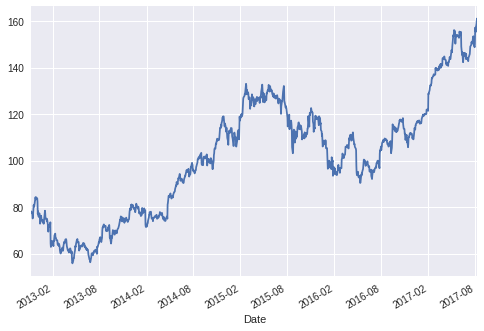

In [123]:
apple['Close'].plot()
plt.show()

### Visualizing with PCA:
1. define your x and y's
2. shift the data, so yesterday's close can predict tomorrow's close
3. Find dominant pricincpal components with PCA model
5. Visualize the Principal components
1. Create a DF of the components of the different PC's


In [124]:
y = apple.Target
apple= apple.iloc[:, 8:].shift()

,Bollinger%b_5,BollingerB_20,Bollinger%b_20,Copp_10,Chaikin,EMA_5,EMA_20,Force_2,KST_10_10_10_15_10_15_20_30,MA_5,...,RSI_12,STD_5,STD_20,SO%d_5,SO%d_20,SO%k,Trix_5,Trix_20,TSI_25_13,Target
Date,,,,,,,,,,,,,,,,,,,,,
2012-11-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-12,0.322020,0.211589,0.052236,-0.182597,9.890195e+06,79.841530,85.395479,-5.314032e+07,-13.859685,80.292,...,0.071578,3.008766,4.566575,0.356641,0.372499,0.629139,-0.011429,-0.003303,-0.371455,0.779817
2012-11-13,0.348732,0.228235,0.082333,-0.195451,3.617770e+06,79.077686,84.646923,-9.861268e+07,-14.642296,79.098,...,0.071578,2.558373,4.891156,0.326256,0.362288,0.265487,-0.011652,-0.003535,-0.384467,0.784404
2012-11-14,0.408464,0.240032,0.130808,-0.199185,1.702727e+07,78.571791,83.970861,5.851259e+07,-15.499557,77.958,...,0.067984,1.087000,5.106765,0.372620,0.372120,0.465347,-0.011197,-0.003761,-0.394642,0.788991
2012-11-15,0.225455,0.249166,0.133741,-0.204383,-9.336754e+06,77.947861,83.277361,8.209727e+06,-16.380838,77.356,...,0.067740,0.597352,5.257553,0.269117,0.342551,0.062112,-0.010644,-0.003982,-0.406822,0.793578


In [125]:
apple = apple.dropna()

In [127]:
X = apple.drop('Target', axis=1)

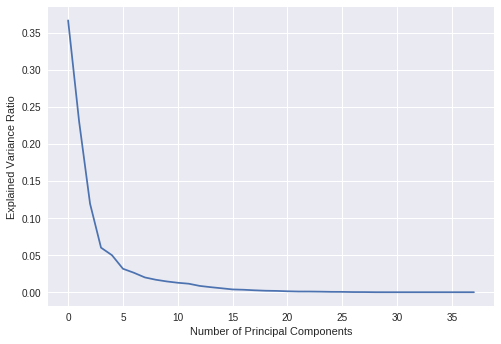

In [137]:
X_standardized = StandardScaler().fit_transform(X)
pca = PCA()
pca.fit(X_standardized)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

From the Plot above we can see that the number of dominate principal components is around 5 

In [138]:
X_r = pca.fit(X_train).transform(X_train)

In [140]:
print('Explained Variance Ration (first five components): %s' % str(pca.explained_variance_ratio_[0:5]))

Explained Variance Ration (first five components): [ 0.85310158  0.07375481  0.0507724   0.01434135  0.00802987]


In [145]:
pc_composition = pd.DataFrame(pca.components_[0:5], index = ["PC1", "PC2", "PC3", "PC4", "PC5"], columns = X_train.columns).T

In [147]:
def highlight_bottom(s):
    '''
    highlight the max and min 3 in a Series yellow.
    '''
    is_blue = s.isin(s.sort_values()[:5])
    return ['background-color: aqua' if v else '' for v in is_blue]


def highlight_top(s):
    '''
    highlight the max and min 3 in a Series yellow.
    '''
    is_red = s.isin(s.sort_values(ascending = False)[:5])
    return ['background-color: crimson' if v else '' for v in is_red]

pc_composition.style.apply(highlight_bottom).apply(highlight_top)